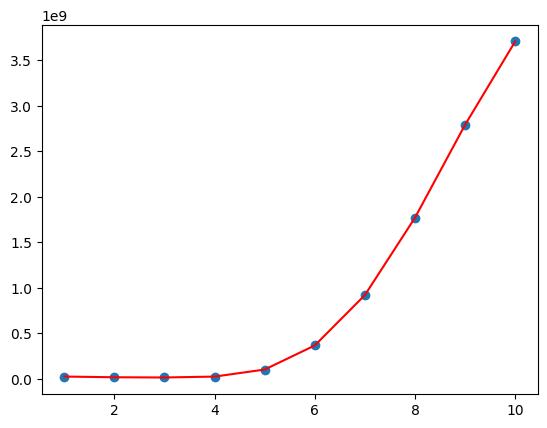

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

%matplotlib inline




df = pd.read_csv("challenge-2-bitcoin.csv")
data = df[['btc_market_price','btc_total_bitcoins', 'btc_transaction_fees']]

def split_dataset():
    """
    参数:
    无

    返回:
    X_train, y_train, X_test, y_test -- 训练集特征、训练集目标、测试集特征、测试集目标
    """
    
    ### 代码开始 ### (≈ 6 行代码)
    train_data = data[:int(len(data)*0.7)]
    test_data = data[int(len(data)*0.7):]
    
    X_train = train_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_train = train_data[['btc_market_price']]
    
    X_test = test_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_test = test_data[['btc_market_price']]
    ### 代码结束 ###
    
    return X_train, y_train, X_test, y_test

# 加载数据
X_train = split_dataset()[0]
y_train = split_dataset()[1]
X_test = split_dataset()[2]
y_test = split_dataset()[3]



def poly3():
    
    """
    参数:
    无

    返回:
    mae -- 预测结果的 MAE 评价指标
    """
    
    ### 代码开始 ### (≈ 7 行代码)
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    poly_X_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(poly_X_train, y_train)
    pre_y = model.predict(poly_X_test)
    
    mae = mean_absolute_error(y_test, pre_y.flatten())
    ### 代码结束 ###
    
    return mae




def poly_plot(N):
 
    """
    参数:
    N -- 标量, 多项式次数

    返回:
    mse -- N 次多项式预测结果的 MSE 评价指标列表
    """
    
    m = 1
    mse = []
    
    ### 代码开始 ### (≈ 6 行代码)
    while m <= N:
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(X_train, y_train)
        pre_y = model.predict(X_test)
        mse.append(mean_squared_error(y_test, pre_y.flatten()))
        m = m + 1
    
    ### 代码结束 ###
    
    return mse


mse = poly_plot(10)

### 代码开始 ### (≈ 2 行代码)
plt.plot([i for i in range(1, 11)], mse, 'r')
plt.scatter([i for i in range(1, 11)], mse)
### 代码结束 ###